In [1]:
from langchain.chat_models import init_chat_model

In [2]:
llm = init_chat_model(
    model="qwen-mt-plus",
    model_provider="openai",
    api_key="sk-ad8b266e73774af59aa08f846ed57178",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
)

In [3]:
llm.invoke("What do you know about LangGraph?")

AIMessage(content="LangGraph is a framework or library designed for building and managing large-scale language models, particularly those used in natural language processing (NLP) tasks. It provides tools and utilities to facilitate the development, training, and deployment of these models. Here are some key aspects of LangGraph:\n\n1. **Model Architecture**: LangGraph allows users to define and customize the architecture of their language models. This includes specifying layers, attention mechanisms, and other components that are crucial for the model's performance.\n\n2. **Training Framework**: It offers a robust training framework that supports distributed training across multiple GPUs or TPUs. This is essential for handling the computational demands of training large language models.\n\n3. **Data Management**: LangGraph includes tools for managing and preprocessing large datasets, which are critical for training effective language models. This includes data cleaning, tokenization, 

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [5]:
graph_builder = StateGraph(State)

In [6]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.add_edge(START, "chatbot")

In [8]:
graph_builder.add_edge("chatbot", END)

In [9]:
graph = graph_builder.compile()

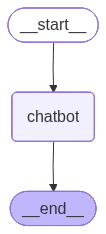

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [11]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: **LangGraph** is a Python library developed by **LangChain**, designed to help developers build stateful, multi-step applications using large language models (LLMs). It extends the LangChain framework by introducing a **graph-based programming model**, where each node in the graph represents a step in an agent’s workflow (e.g., decision-making, tool use, reasoning loops), and edges represent the flow of control between these steps.

### Key Concepts of LangGraph:

1. **State Management**:
   - LangGraph uses a **state object** that persists across steps in the graph.
   - This state can be updated at each node and passed along, enabling memory and context retention throughout long-running or iterative processes.

2. **Graph Structure**:
   - Applications are modeled as **directed graphs**.
   - Nodes represent actions (e.g., calling an LLM, executing a tool, applying logic).
   - Edges define how control flows from one node to another, possibly based on conditions.

3. **Cyc

In [7]:
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用阿里云百炼API Key将下行替换为：api_key="sk-xxx",
    # 新加坡和北京地域的API Key不同。获取API Key：https://help.aliyun.com/zh/model-studio/get-api-key
    api_key=os.getenv("DASHSCOPE_API_KEY"),
    # 以下是北京地域base_url，如果使用新加坡地域的模型，需要将base_url替换为：https://dashscope-intl.aliyuncs.com/compatible-mode/v1
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)
messages = [
    {
        "role": "user",
        "content": "what is your name?"
    }
]
translation_options = {
    "source_lang": "auto",
    "target_lang": "Chinese"
}

completion = client.chat.completions.create(
    model="qwen-mt-turbo",
    messages=messages,
    extra_body={
        "translation_options": translation_options
    }
)
print(completion.choices[0].message.content)


你叫什么名字？
